In [1]:
import pandas as pd

# Baca file Excel (sheet pertama)
df = pd.read_excel('Equinox1_temp.xlsx')

# Simpan ke format CSV
df.to_csv('Equinox1_temp.csv', index=False)

In [3]:
import pandas as pd

# Replace with the URL of your raw dataset file on GitHub
#url = 'https://raw.githubusercontent.com/friansakoko/spatio-temporal/refs/heads/main/Equinox1_Pivot_lag1.csv'
#url = 'https://raw.githubusercontent.com/friansakoko/operasi-matriks/refs/heads/main/Controlled_SK4/Equinox1.csv'

# Load the dataset
#data = pd.read_csv(url)

data = pd.read_csv('Equinox1_temp.csv')

# Display the first few rows of the dataset
data.head()


,Date/Time,BS - ACADEMIC ADMINISTRATION 1:Zone Air Temperature [C](TimeStep),BS - ACADEMIC ADMINISTRATION 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),BS - CLASSROOM 1:Zone Air Temperature [C](TimeStep),BS - CLASSROOM 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),BS - COMPUTER LAB 1:Zone Air Temperature [C](TimeStep),BS - COMPUTER LAB 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),BS - FACULTY LOUNGE 1:Zone Air Temperature [C](TimeStep),BS - FACULTY LOUNGE 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),BS - LIBRARY 1:Zone Air Temperature [C](TimeStep),...,Lag1 - BS - COMPUTER LAB 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),Lag1 - BS - FACULTY LOUNGE 1:Zone Air Temperature [C](TimeStep),Lag1 - BS - FACULTY LOUNGE 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),Lag1 - BS - LIBRARY 1:Zone Air Temperature [C](TimeStep),Lag1 - BS - LIBRARY 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),Lag1 - BS - QA 1:Zone Air Temperature [C](TimeStep),Lag1 - BS - QA 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),Lag1 - BS - LOBBY 1:Zone Air Temperature [C](TimeStep),Lag1 - BS - LOBBY 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),Ambient-Temperature
0,03/18 00:15:00,22.275182,24,22.334548,24,22.482692,24,22.402813,24,21.956882,...,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,18.925
1,03/18 00:30:00,22.267788,24,22.329059,24,22.463354,24,22.402976,24,21.952285,...,24,22.402813,24,21.956882,24,22.460002,24,21.530581,24,19.000
2,03/18 00:45:00,22.265513,24,22.330747,24,22.447625,24,22.406991,24,21.957332,...,24,22.402976,24,21.952285,24,22.458027,24,21.553400,24,19.150
3,03/18 01:00:00,22.254533,24,22.324805,24,22.428116,24,22.394398,24,21.959417,...,24,22.406991,24,21.957332,24,22.459536,24,21.595137,24,19.300
4,03/18 01:15:00,22.238853,24,22.313355,24,22.409208,24,22.375723,24,21.955898,...,24,22.394398,24,21.959417,24,22.443932,24,21.643524,24,19.450


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
data = pd.read_csv(url)

# Add a placeholder year to "Date/Time" and handle extra spaces
data['Date/Time'] = '2024/' + data['Date/Time'].str.strip()

# Convert to datetime format, using automatic parsing for remaining ambiguity
data['timestamp'] = pd.to_datetime(data['Date/Time'], errors='coerce')

# Drop rows with NaT values in the 'timestamp' column
data = data.dropna(subset=['timestamp'])

# Check if conversion succeeded
print("First few rows after timestamp conversion:")
print(data.head())

First few rows after timestamp conversion:
              Date/Time  \
0  2024/03/18  00:15:00   
1  2024/03/18  00:30:00   
2  2024/03/18  00:45:00   
3  2024/03/18  01:00:00   
4  2024/03/18  01:15:00   

   BS - ACADEMIC ADMINISTRATION 1:Zone Air Temperature [C](TimeStep)  \
0                                          22.275182                   
1                                          22.267788                   
2                                          22.265513                   
3                                          22.254533                   
4                                          22.238853                   

   BS - ACADEMIC ADMINISTRATION 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)  \
0                                                 24                                           
1                                                 24                                           
2                                                 24                     

In [4]:
# Tampilkan 10 baris awal dari kolom Date/Time asli
print(data['Date/Time'].head(10))

0     03/18  00:15:00
1     03/18  00:30:00
2     03/18  00:45:00
3     03/18  01:00:00
4     03/18  01:15:00
5     03/18  01:30:00
6     03/18  01:45:00
7     03/18  02:00:00
8     03/18  02:15:00
9     03/18  02:30:00
Name: Date/Time, dtype: object


In [5]:
# Menampilkan nama kolom
for i, col in enumerate(data.columns):
    print(f"{i}: {col}")

0: Date/Time
1: BS - ACADEMIC ADMINISTRATION 1:Zone Air Temperature [C](TimeStep)
2: BS - ACADEMIC ADMINISTRATION 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)
3: BS - CLASSROOM 1:Zone Air Temperature [C](TimeStep)
4: BS - CLASSROOM 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)
5: BS - COMPUTER LAB 1:Zone Air Temperature [C](TimeStep)
6: BS - COMPUTER LAB 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)
7: BS - FACULTY LOUNGE 1:Zone Air Temperature [C](TimeStep)
8: BS - FACULTY LOUNGE 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)
9: BS - LIBRARY 1:Zone Air Temperature [C](TimeStep)
10: BS - LIBRARY 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)
11: BS - QA 1:Zone Air Temperature [C](TimeStep)
12: BS - QA 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)
13: BS - LOBBY 1:Zone Air Temperature [C](TimeStep)
14: BS - LOBBY 1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)
15: BS - Whole Building:Fa

In [6]:
# Hilangkan spasi ekstra di tengah string
data['Date/Time'] = data['Date/Time'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Konversi ke datetime (format otomatis sudah cukup sekarang)
data['timestamp'] = pd.to_datetime(data['Date/Time'], errors='coerce')

# Drop baris gagal parsing
data = data.dropna(subset=['timestamp'])

# Cek hasilnya
print("Jumlah baris setelah parsing:", len(data))
print(data[['Date/Time', 'timestamp']].head())


Jumlah baris setelah parsing: 475
             Date/Time           timestamp
0  2024/03/18 00:15:00 2024-03-18 00:15:00
1  2024/03/18 00:30:00 2024-03-18 00:30:00
2  2024/03/18 00:45:00 2024-03-18 00:45:00
3  2024/03/18 01:00:00 2024-03-18 01:00:00
4  2024/03/18 01:15:00 2024-03-18 01:15:00


In [12]:
# Ambil nama kolom berdasarkan posisi indeks
input_cols = [data.columns[i] for i in [47, 49, 51, 53, 55, 57, 59, 61]]
target_cols = [data.columns[i] for i in [1, 3, 5, 7, 9, 11, 13]]

print("Input columns:", input_cols)
print("Target columns:", target_cols)


Input columns: ['Lag1 - BS - ACADEMIC ADMINISTRATION 1:Zone Air Temperature [C](TimeStep)', 'Lag1 - BS - CLASSROOM 1:Zone Air Temperature [C](TimeStep)', 'Lag1 - BS - COMPUTER LAB 1:Zone Air Temperature [C](TimeStep)', 'Lag1 - BS - FACULTY LOUNGE 1:Zone Air Temperature [C](TimeStep)', 'Lag1 - BS - LIBRARY 1:Zone Air Temperature [C](TimeStep)', 'Lag1 - BS - QA 1:Zone Air Temperature [C](TimeStep)', 'Lag1 - BS - LOBBY 1:Zone Air Temperature [C](TimeStep)', 'Ambient-Temperature']
Target columns: ['BS - ACADEMIC ADMINISTRATION 1:Zone Air Temperature [C](TimeStep)', 'BS - CLASSROOM 1:Zone Air Temperature [C](TimeStep)', 'BS - COMPUTER LAB 1:Zone Air Temperature [C](TimeStep)', 'BS - FACULTY LOUNGE 1:Zone Air Temperature [C](TimeStep)', 'BS - LIBRARY 1:Zone Air Temperature [C](TimeStep)', 'BS - QA 1:Zone Air Temperature [C](TimeStep)', 'BS - LOBBY 1:Zone Air Temperature [C](TimeStep)']


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Gabungkan input dan target kolom untuk diskalakan
selected_cols = input_cols + target_cols
scaled_df = data[selected_cols].copy()

# Drop baris yang mengandung NaN (penting sebelum scaling)
scaled_df = scaled_df.dropna()

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(scaled_df)

# Simpan kembali sebagai DataFrame dengan kolom asli
scaled_df = pd.DataFrame(scaled_values, index=scaled_df.index, columns=scaled_df.columns)


In [14]:
import numpy as np

n_past = 24  # misalnya 6 jam sebelumnya (jika 15 menit interval)

X_list = []
y_list = []

for i in range(n_past, len(scaled_df)):
    past_window = scaled_df[input_cols].iloc[i - n_past:i].values  # (24, 7)
    target = scaled_df[target_cols].iloc[i].values  # (7,)

    X_list.append(past_window)
    y_list.append(target)

X = np.array(X_list)  # (n_samples, 24, 7)
y = np.array(y_list)  # (n_samples, 7)

print("Input shape (X):", X.shape)
print("Target shape (y):", y.shape)


Input shape (X): (456, 24, 8)
Target shape (y): (456, 7)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # tidak acak agar urutan waktu tetap
)

In [17]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1]))  # Output = jumlah target kolom = 7

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                18688     
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 19,143
Trainable params: 19,143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 5s 103ms/step - loss: 0.1201 - val_loss: 0.0445
Epoch 2/200
10/10 [==============================] - 0s 43ms/step - loss: 0.0595 - val_loss: 0.0437
Epoch 3/200
10/10 [==============================] - 1s 76ms/step - loss: 0.0474 - val_loss: 0.0236
Epoch 4/200
10/10 [==============================] - 1s 62ms/step - loss: 0.0450 - val_loss: 0.0413
Epoch 5/200
10/10 [==========================

10/10 [==============================] - 1s 73ms/step - loss: 0.0182 - val_loss: 0.0128
Epoch 76/200
10/10 [==============================] - 0s 49ms/step - loss: 0.0176 - val_loss: 0.0158
Epoch 77/200
10/10 [==============================] - 2s 191ms/step - loss: 0.0182 - val_loss: 0.0082
Epoch 78/200
10/10 [==============================] - 1s 53ms/step - loss: 0.0168 - val_loss: 0.0089
Epoch 79/200
10/10 [==============================] - 1s 55ms/step - loss: 0.0161 - val_loss: 0.0213
Epoch 80/200
10/10 [==============================] - 0s 36ms/step - loss: 0.0162 - val_loss: 0.0402
Epoch 81/200
10/10 [==============================] - 0s 37ms/step - loss: 0.0223 - val_loss: 0.0105
Epoch 82/200
10/10 [==============================] - 1s 65ms/step - loss: 0.0174 - val_loss: 0.0117
Epoch 83/200
10/10 [==============================] - 1s 58ms/step - loss: 0.0158 - val_loss: 0.0083
Epoch 84/200
10/10 [==============================] - 1s 59ms/step - loss: 0.0140 - val_loss: 0.0112
Ep

10/10 [==============================] - 0s 37ms/step - loss: 0.0065 - val_loss: 0.0081
Epoch 156/200
10/10 [==============================] - 0s 30ms/step - loss: 0.0060 - val_loss: 0.0113
Epoch 157/200
10/10 [==============================] - 0s 32ms/step - loss: 0.0059 - val_loss: 0.0086
Epoch 158/200
10/10 [==============================] - 0s 37ms/step - loss: 0.0073 - val_loss: 0.0145
Epoch 159/200
10/10 [==============================] - 0s 34ms/step - loss: 0.0067 - val_loss: 0.0189
Epoch 160/200
10/10 [==============================] - 0s 36ms/step - loss: 0.0077 - val_loss: 0.0071
Epoch 161/200
10/10 [==============================] - 0s 30ms/step - loss: 0.0073 - val_loss: 0.0140
Epoch 162/200
10/10 [==============================] - 0s 31ms/step - loss: 0.0060 - val_loss: 0.0088
Epoch 163/200
10/10 [==============================] - 0s 44ms/step - loss: 0.0054 - val_loss: 0.0087
Epoch 164/200
10/10 [==============================] - 1s 67ms/step - loss: 0.0052 - val_loss: 0

In [18]:
predictions = model.predict(X_test)

3/3 [==============================] - 2s 16ms/step


In [19]:
# Gabungkan prediksi dengan dummy kolom input agar bisa di-inverse scale
dummy_input = np.zeros((predictions.shape[0], len(input_cols)))
pred_concat = np.concatenate([dummy_input, predictions], axis=1)

# Inverse scaling, lalu ambil hanya bagian target
pred_rescaled = scaler.inverse_transform(pred_concat)[:, len(input_cols):]

# Sama untuk nilai sebenarnya
y_concat = np.concatenate([dummy_input, y_test], axis=1)
y_rescaled = scaler.inverse_transform(y_concat)[:, len(input_cols):]


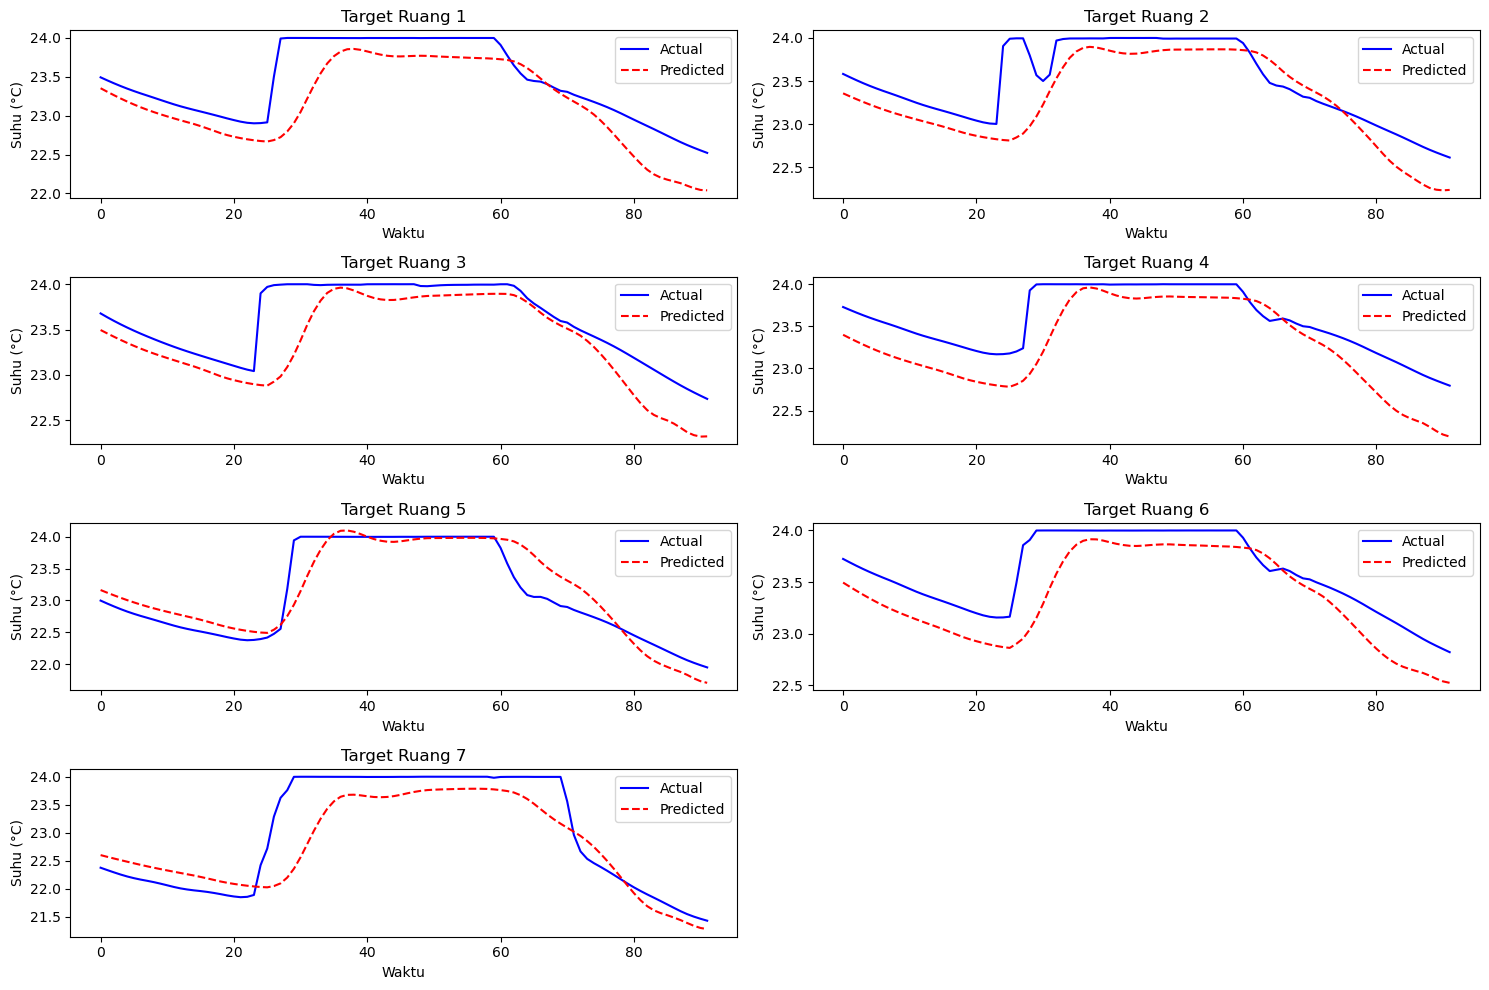

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i in range(7):  # untuk 7 target ruangan
    plt.subplot(4, 2, i + 1)
    plt.plot(y_rescaled[:, i], label='Actual', color='blue')
    plt.plot(pred_rescaled[:, i], label='Predicted', color='red', linestyle='dashed')
    plt.title(f'Target Ruang {i+1}')
    plt.xlabel('Waktu')
    plt.ylabel('Suhu (°C)')
    plt.legend()

plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [24]:
mse = mean_squared_error(y_rescaled, pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_rescaled, pred_rescaled)

print(f"Total MSE: {mse:.2f}")
print(f"Total RMSE: {rmse:.2f}")
print(f"Total MAE: {mae:.2f}")


Total MSE: 0.13
Total RMSE: 0.36
Total MAE: 0.27


In [25]:
for i in range(y_rescaled.shape[1]):
    mse_i = mean_squared_error(y_rescaled[:, i], pred_rescaled[:, i])
    rmse_i = np.sqrt(mse_i)
    mae_i = mean_absolute_error(y_rescaled[:, i], pred_rescaled[:, i])
    print(f"Ruang {i+1}: MSE = {mse_i:.2f}, RMSE = {rmse_i:.2f}, MAE = {mae_i:.2f}")


Ruang 1: MSE = 0.15, RMSE = 0.38, MAE = 0.30
Ruang 2: MSE = 0.11, RMSE = 0.33, MAE = 0.24
Ruang 3: MSE = 0.11, RMSE = 0.34, MAE = 0.24
Ruang 4: MSE = 0.13, RMSE = 0.36, MAE = 0.30
Ruang 5: MSE = 0.08, RMSE = 0.29, MAE = 0.21
Ruang 6: MSE = 0.09, RMSE = 0.30, MAE = 0.24
Ruang 7: MSE = 0.24, RMSE = 0.49, MAE = 0.37


In [28]:
# R2 Score
r2 = r2_score(y_rescaled, pred_rescaled)

# NMBE (dalam %)
nmbe = 100 * np.sum(y_rescaled - pred_rescaled) / (y_rescaled.shape[0] * np.mean(y_rescaled))

# CV-RMSE (dalam %)
rmse = np.sqrt(mean_squared_error(y_rescaled, pred_rescaled))
cv_rmse = 100 * rmse / np.mean(y_rescaled)

print(f"R² Score     : {r2:.4f}")
print(f"NMBE         : {nmbe:.2f} %")
print(f"CV(RMSE)     : {cv_rmse:.2f} %")


R² Score     : 0.4350
NMBE         : 6.04 %
CV(RMSE)     : 1.54 %


In [27]:
from sklearn.metrics import r2_score

for i in range(y_rescaled.shape[1]):
    r2_i = r2_score(y_rescaled[:, i], pred_rescaled[:, i])
    nmbe_i = 100 * np.sum(y_rescaled[:, i] - pred_rescaled[:, i]) / (y_rescaled.shape[0] * np.mean(y_rescaled[:, i]))
    rmse_i = np.sqrt(mean_squared_error(y_rescaled[:, i], pred_rescaled[:, i]))
    cv_rmse_i = 100 * rmse_i / np.mean(y_rescaled[:, i])
    
    print(f"Ruang {i+1}: R² = {r2_i:.4f}, NMBE = {nmbe_i:.2f} %, CV(RMSE) = {cv_rmse_i:.2f} %")


Ruang 1: R² = 0.3666, NMBE = 1.22 %, CV(RMSE) = 1.63 %
Ruang 2: R² = 0.4336, NMBE = 0.87 %, CV(RMSE) = 1.41 %
Ruang 3: R² = 0.2867, NMBE = 1.02 %, CV(RMSE) = 1.43 %
Ruang 4: R² = 0.0368, NMBE = 1.25 %, CV(RMSE) = 1.54 %
Ruang 5: R² = 0.8354, NMBE = -0.24 %, CV(RMSE) = 1.24 %
Ruang 6: R² = 0.3356, NMBE = 1.00 %, CV(RMSE) = 1.25 %
Ruang 7: R² = 0.7499, NMBE = 0.90 %, CV(RMSE) = 2.14 %
